In [ ]:
#2.1	Analysis of Literacy Rate vs Total Crimes.

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [156]:
# Read the India crimes and Literacy data into dataframes
Crime_Rate = pd.read_csv('Crime_Rate.csv')
literacy_data = pd.read_csv('GOI.csv')

In [157]:
 
Crime_Rate

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,Puducherry,2010,Cruelty by Husband or Relatives,0,0,0,0,0,0,0,0,0
10496,Puducherry,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0
10497,Puducherry,2010,Causing death by negligence,0,0,0,0,0,0,0,0,0
10498,Puducherry,2010,Other IPC Crimes,0,0,1,0,2,3,3,3,6


In [158]:
print("Crime_Rate Data:")
print( Crime_Rate.head())

print("\nLiteracy Data:")
print(literacy_data.head())

Crime_Rate Data:
         STATE/UT  Year                        CRIME  Boys 7-12 Years  \
0  Andhra Pradesh  2001                       Murder                3   
1  Andhra Pradesh  2001     Attempt to Commit Murder                2   
2  Andhra Pradesh  2001  C H Not amounting to Murder                0   
3  Andhra Pradesh  2001                         Rape                2   
4  Andhra Pradesh  2001               Custodial Rape                0   

   Girls 7-12 Years  Boys 12-16 Years  Girls 12-16 Years  Boys 16-18 Years  \
0                 0                 7                  0                 5   
1                 0                 0                  0                11   
2                 0                 0                  0                 0   
3                 0                15                  0                 2   
4                 0                 0                  0                 0   

   Girls 16-18 Years  Total for boys all Age Groups  \
0                  0

In [159]:
# print original columns
print('Original columns:')
print(Literacy_data.columns)

# rename the 'state' column 
Literacy_data = Literacy_data.rename(columns={'Country/ States/ Union Territories Name': 'STATE/UT',})

# print new columns
print('New columns:')
print(Literacy_data.columns)

Original columns:
Index(['Category', 'STATE/UT', 'Literacy Rate (Persons) - Total - 2001',
       'Literacy Rate (Persons) - Total - 2011',
       'Literacy Rate (Persons) - Rural - 2001',
       'Literacy Rate (Persons) - Rural - 2011',
       'Literacy Rate (Persons) - Urban - 2001',
       'Literacy Rate (Persons) - Urban - 2011'],
      dtype='object')
New columns:
Index(['Category', 'STATE/UT', 'Literacy Rate (Persons) - Total - 2001',
       'Literacy Rate (Persons) - Total - 2011',
       'Literacy Rate (Persons) - Rural - 2001',
       'Literacy Rate (Persons) - Rural - 2011',
       'Literacy Rate (Persons) - Urban - 2001',
       'Literacy Rate (Persons) - Urban - 2011'],
      dtype='object')


In [160]:
merged_data = pd.merge(Crime_Rate, Literacy_data, on='STATE/UT')

In [161]:
merged_data

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total,Category,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15,State,60.5,67.0,54.5,60.4,76.1,80.1
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13,State,60.5,67.0,54.5,60.4,76.1,80.1
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0,State,60.5,67.0,54.5,60.4,76.1,80.1
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20,State,60.5,67.0,54.5,60.4,76.1,80.1
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0,State,60.5,67.0,54.5,60.4,76.1,80.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,Puducherry,2010,Cruelty by Husband or Relatives,0,0,0,0,0,0,0,0,0,Union Territory,81.2,85.8,74.0,80.1,84.8,88.5
9596,Puducherry,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0,Union Territory,81.2,85.8,74.0,80.1,84.8,88.5
9597,Puducherry,2010,Causing death by negligence,0,0,0,0,0,0,0,0,0,Union Territory,81.2,85.8,74.0,80.1,84.8,88.5
9598,Puducherry,2010,Other IPC Crimes,0,0,1,0,2,3,3,3,6,Union Territory,81.2,85.8,74.0,80.1,84.8,88.5


In [162]:
# Check the column names in the merged_data DataFrame
print(merged_data.columns)

Index(['STATE/UT', 'Year', 'CRIME', 'Boys 7-12 Years', 'Girls 7-12 Years',
       'Boys 12-16 Years', 'Girls 12-16 Years', 'Boys 16-18 Years',
       'Girls 16-18 Years', 'Total for boys all Age Groups',
       'Total for girls all Age Groups', 'Grand total', 'Category',
       'Literacy Rate (Persons) - Total - 2001',
       'Literacy Rate (Persons) - Total - 2011',
       'Literacy Rate (Persons) - Rural - 2001',
       'Literacy Rate (Persons) - Rural - 2011',
       'Literacy Rate (Persons) - Urban - 2001',
       'Literacy Rate (Persons) - Urban - 2011'],
      dtype='object')


In [163]:
# Print out the first few rows of the merged_data DataFrame
print(merged_data.head())

         STATE/UT  Year                        CRIME  Boys 7-12 Years  \
0  Andhra Pradesh  2001                       Murder                3   
1  Andhra Pradesh  2001     Attempt to Commit Murder                2   
2  Andhra Pradesh  2001  C H Not amounting to Murder                0   
3  Andhra Pradesh  2001                         Rape                2   
4  Andhra Pradesh  2001               Custodial Rape                0   

   Girls 7-12 Years  Boys 12-16 Years  Girls 12-16 Years  Boys 16-18 Years  \
0                 0                 7                  0                 5   
1                 0                 0                  0                11   
2                 0                 0                  0                 0   
3                 0                15                  0                 2   
4                 0                 0                  0                 0   

   Girls 16-18 Years  Total for boys all Age Groups  \
0                  0                 

In [164]:
# Check for missing values in each DataFrame
print("Missing values in India Crimes Data:")
print(Crime_Rate.isnull().sum())

print("\nMissing values in Literacy Data:")
print(literacy_data.isnull().sum())

Missing values in India Crimes Data:
STATE/UT                          0
Year                              0
CRIME                             0
Boys 7-12 Years                   0
Girls 7-12 Years                  0
Boys 12-16 Years                  0
Girls 12-16 Years                 0
Boys 16-18 Years                  0
Girls 16-18 Years                 0
Total for boys all Age Groups     0
Total for girls all Age Groups    0
Grand total                       0
dtype: int64

Missing values in Literacy Data:
Category                                   0
Country/ States/ Union Territories Name    0
Literacy Rate (Persons) - Total - 2001     0
Literacy Rate (Persons) - Total - 2011     0
Literacy Rate (Persons) - Rural - 2001     0
Literacy Rate (Persons) - Rural - 2011     0
Literacy Rate (Persons) - Urban - 2001     0
Literacy Rate (Persons) - Urban - 2011     0
dtype: int64


In [165]:
# Check for and remove duplicates in each DataFrame
Crime_Rate.drop_duplicates(inplace=True)
literacy_data.drop_duplicates(inplace=True)

In [166]:
# Check data types of columns in each DataFrame
print("Data Types in India Crimes Data:")
print(Crime_Rate.dtypes)

print("\nData Types in Literacy Data:")
print(literacy_data.dtypes)

Data Types in India Crimes Data:
STATE/UT                          object
Year                               int64
CRIME                             object
Boys 7-12 Years                    int64
Girls 7-12 Years                   int64
Boys 12-16 Years                   int64
Girls 12-16 Years                  int64
Boys 16-18 Years                   int64
Girls 16-18 Years                  int64
Total for boys all Age Groups      int64
Total for girls all Age Groups     int64
Grand total                        int64
dtype: object

Data Types in Literacy Data:
Category                                    object
Country/ States/ Union Territories Name     object
Literacy Rate (Persons) - Total - 2001     float64
Literacy Rate (Persons) - Total - 2011     float64
Literacy Rate (Persons) - Rural - 2001     float64
Literacy Rate (Persons) - Rural - 2011     float64
Literacy Rate (Persons) - Urban - 2001     float64
Literacy Rate (Persons) - Urban - 2011     float64
dtype: object


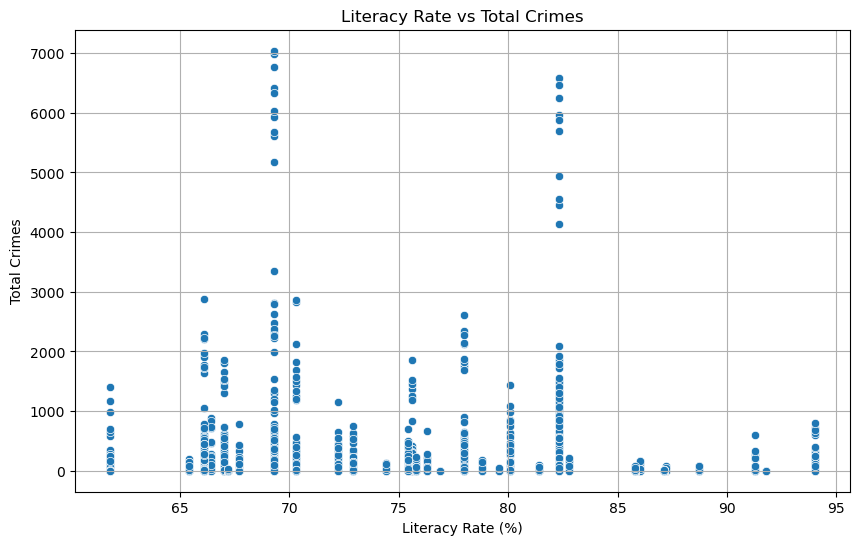

In [167]:
# Data Visualization
# Scatter plot of literacy rate vs total crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Literacy Rate (Persons) - Total - 2011', y='Grand total')
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()

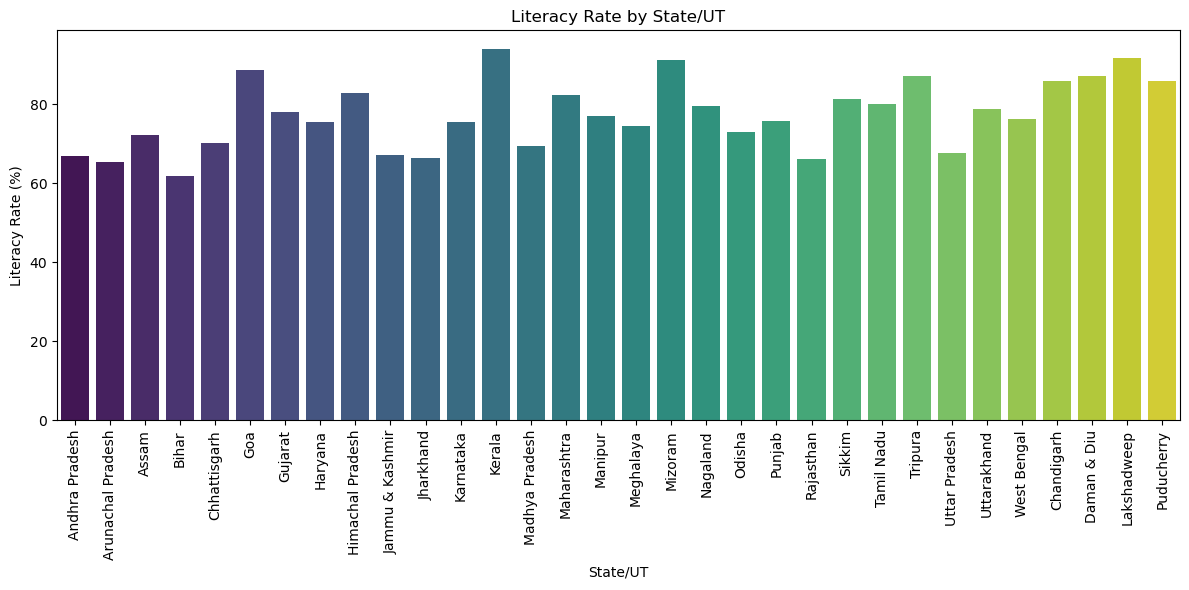

In [168]:
# Bar plot comparing literacy rate and total crimes across states
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE/UT', y='Literacy Rate (Persons) - Total - 2011', data=merged_data, palette='viridis')
plt.title('Literacy Rate by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


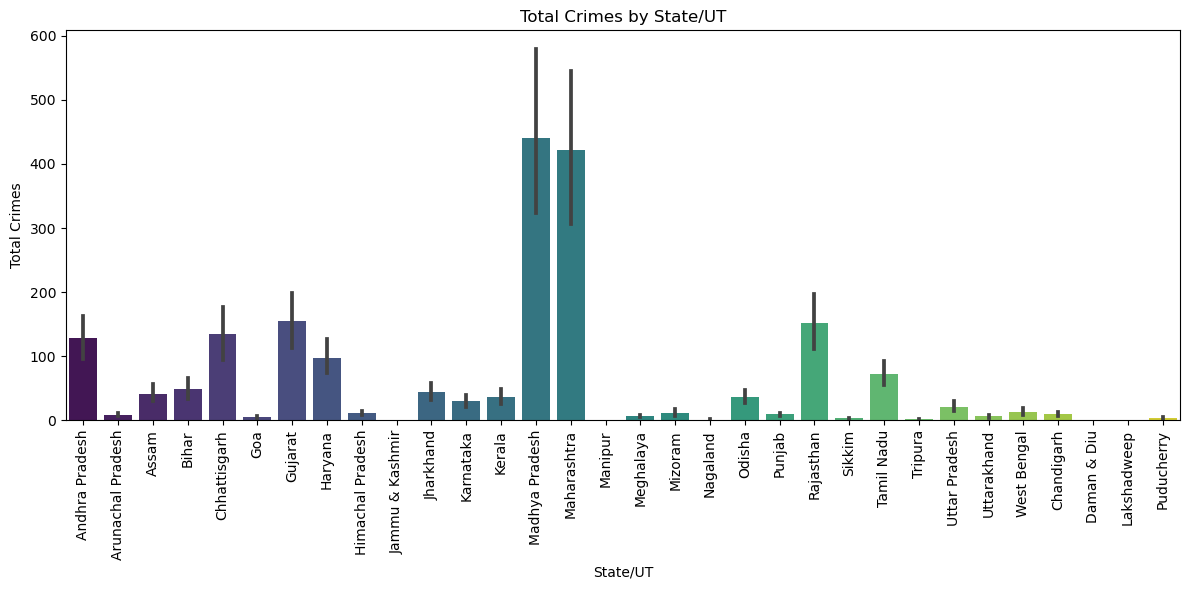

In [169]:
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE/UT', y='Grand total', data=merged_data, palette='viridis')
plt.title('Total Crimes by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [170]:

#2.2	 Analysis of the type of crime vs each state vs Literacy rate.

In [92]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
Crime_type=pd.read_csv("Crime_type")

In [94]:
Crime_type.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [95]:
literacy_data = pd.read_csv('GOI.csv')
literacy_data.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [96]:
merged_data = pd.merge(Crime_Rate, literacy_data, left_on='STATE/UT', right_on='Country/ States/ Union Territories Name', how='inner')

In [97]:
merged_data

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,Puducherry,2010,Cruelty by Husband or Relatives,0,0,0,0,0,0,0,0,0,Union Territory,Puducherry,81.2,85.8,74.0,80.1,84.8,88.5
9596,Puducherry,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0,Union Territory,Puducherry,81.2,85.8,74.0,80.1,84.8,88.5
9597,Puducherry,2010,Causing death by negligence,0,0,0,0,0,0,0,0,0,Union Territory,Puducherry,81.2,85.8,74.0,80.1,84.8,88.5
9598,Puducherry,2010,Other IPC Crimes,0,0,1,0,2,3,3,3,6,Union Territory,Puducherry,81.2,85.8,74.0,80.1,84.8,88.5


In [98]:

# Explore the merged data
print(merged_data.head())

         STATE/UT  Year                        CRIME  Boys 7-12 Years  \
0  Andhra Pradesh  2001                       Murder                3   
1  Andhra Pradesh  2001     Attempt to Commit Murder                2   
2  Andhra Pradesh  2001  C H Not amounting to Murder                0   
3  Andhra Pradesh  2001                         Rape                2   
4  Andhra Pradesh  2001               Custodial Rape                0   

   Girls 7-12 Years  Boys 12-16 Years  Girls 12-16 Years  Boys 16-18 Years  \
0                 0                 7                  0                 5   
1                 0                 0                  0                11   
2                 0                 0                  0                 0   
3                 0                15                  0                 2   
4                 0                 0                  0                 0   

   Girls 16-18 Years  Total for boys all Age Groups  \
0                  0                 

In [100]:
print(merged_data.columns)

Index(['STATE/UT', 'Year', 'CRIME', 'Boys 7-12 Years', 'Girls 7-12 Years',
       'Boys 12-16 Years', 'Girls 12-16 Years', 'Boys 16-18 Years',
       'Girls 16-18 Years', 'Total for boys all Age Groups',
       'Total for girls all Age Groups', 'Grand total', 'Category',
       'Country/ States/ Union Territories Name',
       'Literacy Rate (Persons) - Total - 2001',
       'Literacy Rate (Persons) - Total - 2011',
       'Literacy Rate (Persons) - Rural - 2001',
       'Literacy Rate (Persons) - Rural - 2011',
       'Literacy Rate (Persons) - Urban - 2001',
       'Literacy Rate (Persons) - Urban - 2011'],
      dtype='object')


Correlation Coefficient (2001): -0.030898839992097065
Correlation Coefficient (2011): -0.06904615348668156


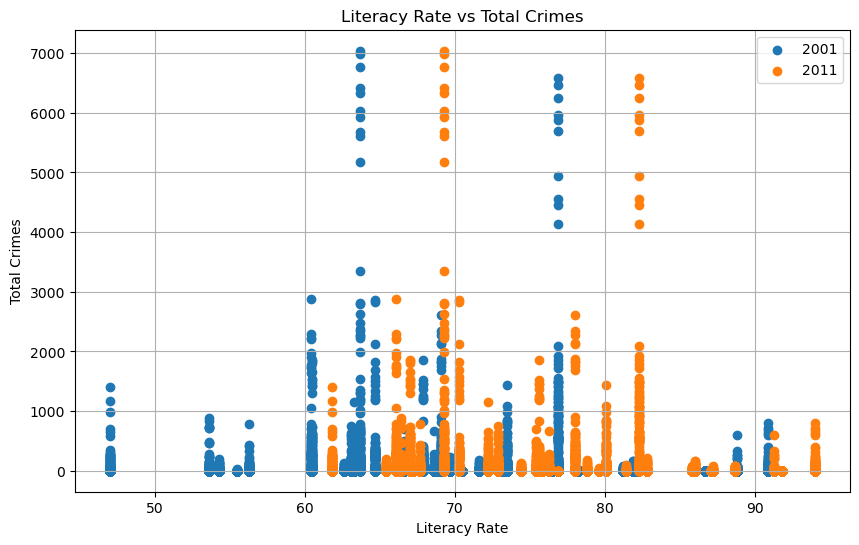

In [101]:
# Calculate the correlation coefficient
correlation_2001 = merged_data['Literacy Rate (Persons) - Total - 2001'].corr(merged_data['Grand total'])
correlation_2011 = merged_data['Literacy Rate (Persons) - Total - 2011'].corr(merged_data['Grand total'])

# Print the correlation coefficients
print("Correlation Coefficient (2001):", correlation_2001)
print("Correlation Coefficient (2011):", correlation_2011)

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Literacy Rate (Persons) - Total - 2001'], merged_data['Grand total'], label='2001')
plt.scatter(merged_data['Literacy Rate (Persons) - Total - 2011'], merged_data['Grand total'], label='2011')
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#2.3 Analysis of year-on-year total crime rate.



In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
Crime_Rate = pd.read_csv('Crime_Rate.csv')
Crime_Rate.head()

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0


In [62]:
# Assuming Crime_Rate contains the crime data
# Group the data by year and calculate the total crime rate for each year
yearly_total_crime = Crime_Rate.groupby('Year')['Grand total'].sum()


In [63]:
# Print the yearly total crime data to verify
print("Yearly Total Crime Data:")
print(yearly_total_crime)


Yearly Total Crime Data:
Year
2001    52314
2002    55411
2003    54926
2004    56291
2005    57997
2006    61397
2007    68212
2008    70486
2009    65841
2010    62532
Name: Grand total, dtype: int64


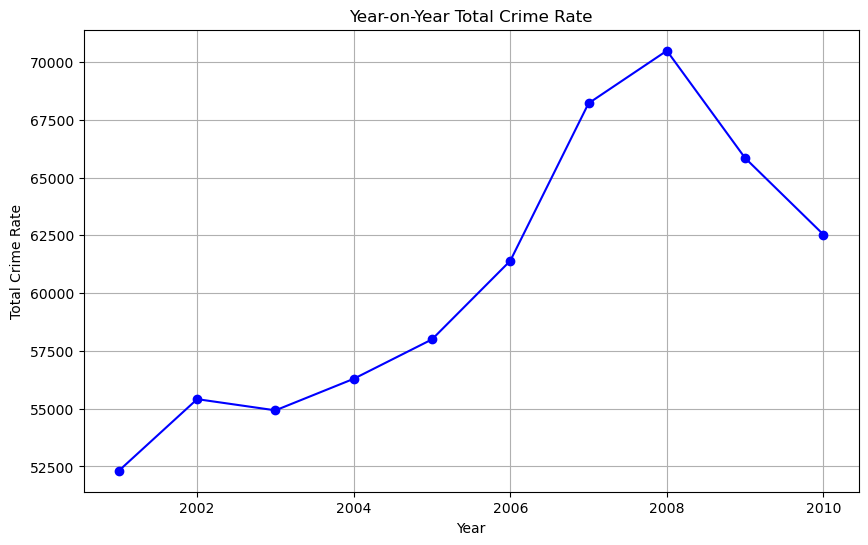

In [64]:
# Visualize the year-on-year trend of the total crime rate
plt.figure(figsize=(10, 6))
yearly_total_crime.plot(kind='line', marker='o', color='b')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crime Rate')
plt.grid(True)
plt.show()

In [ ]:
#2.4 Analysis of area vs overall crime

In [68]:
Crime_Rate = pd.read_csv('Crime_Rate.csv')
india_states_area=pd.read_csv('india_states_area.csv')

In [69]:

india_states_area.head()

,States_Union Territories,2001 - POP,2011- POP,2001 - LIT,2011- LIT,Area (km2)
0,Andaman and Nicobar Islands,356.0,381.0,81.30,86.63,"8,249"
1,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205"
2,Arunachal Pradesh,1098.0,1384.0,54.34,65.39,"83,743"
3,Assam,26656.0,31206.0,63.25,72.19,"78,438"
4,Bihar,82999.0,104099.0,47.00,61.80,"94,163"


In [71]:
Crime_Rate.head()

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0


In [72]:
print("India States Area Data:")
print(india_states_area.head())

print("\nCrime Rate Data:")
print(Crime_Rate.head())

India States Area Data:
      States_Union Territories  2001 - POP  2011- POP  2001 - LIT  2011- LIT  \
0  Andaman and Nicobar Islands       356.0      381.0       81.30      86.63   
1               Andhra Pradesh     76210.0    84581.0       60.47      67.02   
2            Arunachal Pradesh      1098.0     1384.0       54.34      65.39   
3                        Assam     26656.0    31206.0       63.25      72.19   
4                        Bihar     82999.0   104099.0       47.00      61.80   

  Area (km2)  
0      8,249  
1    160,205  
2     83,743  
3     78,438  
4     94,163  

Crime Rate Data:
         STATE/UT  Year                        CRIME  Boys 7-12 Years  \
0  Andhra Pradesh  2001                       Murder                3   
1  Andhra Pradesh  2001     Attempt to Commit Murder                2   
2  Andhra Pradesh  2001  C H Not amounting to Murder                0   
3  Andhra Pradesh  2001                         Rape                2   
4  Andhra Pradesh  200

In [78]:
merged_data = pd.merge(india_states_area, Crime_Rate, left_on='States_Union Territories', right_on='STATE/UT', how='inner')
merged_data

,States_Union Territories,2001 - POP,2011- POP,2001 - LIT,2011- LIT,Area (km2),STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Cruelty by Husband or Relatives,0,0,1,0,6,3,7,3,10
8696,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0
8697,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Causing death by negligence,0,0,0,0,1,0,1,0,1
8698,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Other IPC Crimes,0,0,15,0,23,1,38,1,39


In [80]:
 #Calculate the overall crime rate for each state/UT by summing up the total crimes for all years
overall_crime_rate = merged_data.groupby('States_Union Territories')['Grand total'].sum().reset_index()
overall_crime_rate

,States_Union Territories,Grand total
0,Andhra Pradesh,38369
1,Arunachal Pradesh,2673
2,Assam,12332
3,Bihar,14476
4,Chandigarh,2784
5,Chhattisgarh,40208
6,Goa,1670
7,Gujarat,46523
8,Haryana,29216
9,Himachal Pradesh,3212


In [75]:
# Print the overall crime rate data to verify
print("Overall Crime Rate Data:")
print(overall_crime_rate.head())


Overall Crime Rate Data:
  States_Union Territories  Grand total
0           Andhra Pradesh        38369
1        Arunachal Pradesh         2673
2                    Assam        12332
3                    Bihar        14476
4               Chandigarh         2784


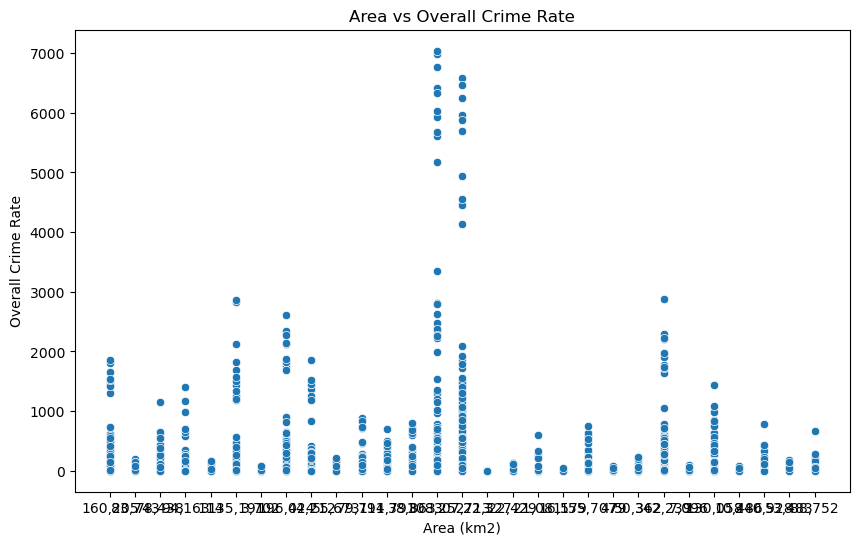

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Area (km2)', y='Grand total')
plt.title('Area vs Overall Crime Rate')
plt.xlabel('Area (km2)')
plt.ylabel('Overall Crime Rate')
plt.show()

#2.5	 Analysis of Population vs overall Crime

In [ ]:
#2.5	 Analysis of Population vs overall Crime

In [82]:
Crime_Rate = pd.read_csv('Crime_Rate.csv')
india_states_population=pd.read_csv('india_states_area.csv')

In [86]:
india_states_population.head()

,States_Union Territories,2001 - POP,2011- POP,2001 - LIT,2011- LIT,Area (km2)
0,Andaman and Nicobar Islands,356.0,381.0,81.30,86.63,"8,249"
1,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205"
2,Arunachal Pradesh,1098.0,1384.0,54.34,65.39,"83,743"
3,Assam,26656.0,31206.0,63.25,72.19,"78,438"
4,Bihar,82999.0,104099.0,47.00,61.80,"94,163"


In [84]:
merged_data = pd.merge(india_states_population, Crime_Rate, left_on='States_Union Territories', right_on='STATE/UT', how='inner')
merged_data

,States_Union Territories,2001 - POP,2011- POP,2001 - LIT,2011- LIT,Area (km2),STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,76210.0,84581.0,60.47,67.02,"160,205",Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Cruelty by Husband or Relatives,0,0,1,0,6,3,7,3,10
8696,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0
8697,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Causing death by negligence,0,0,0,0,1,0,1,0,1
8698,West Bengal,80176.0,91276.0,56.27,67.68,"88,752",West Bengal,2010,Other IPC Crimes,0,0,15,0,23,1,38,1,39


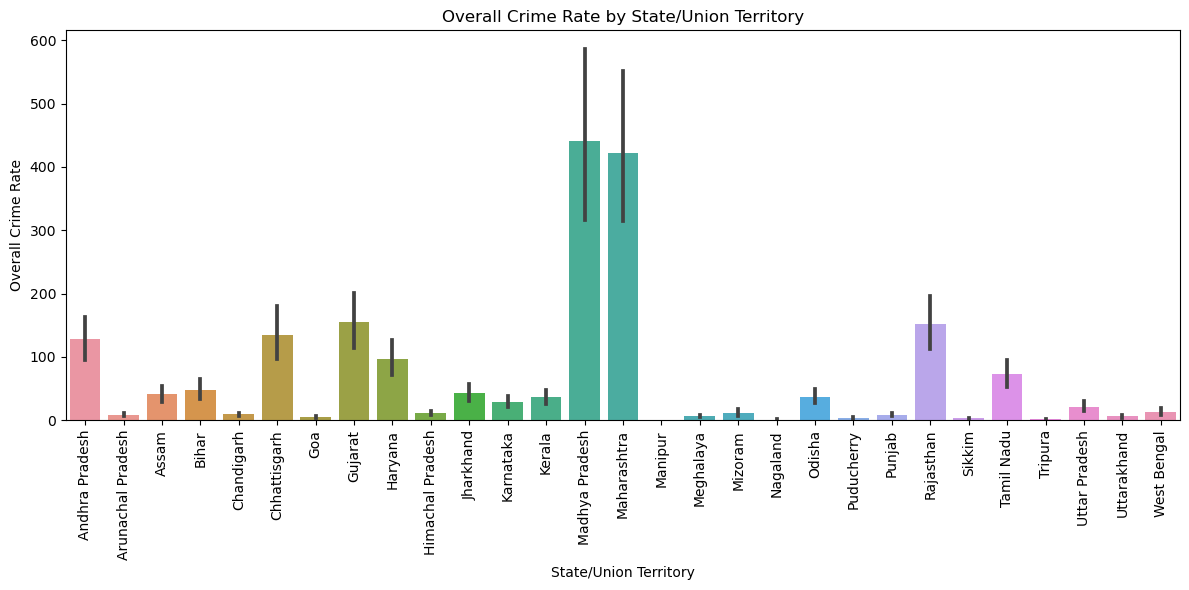

In [85]:
# Visualize the relationship between population and overall crime rate using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='States_Union Territories', y='Grand total', data=merged_data)
plt.title('Overall Crime Rate by State/Union Territory')
plt.xlabel('State/Union Territory')
plt.ylabel('Overall Crime Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

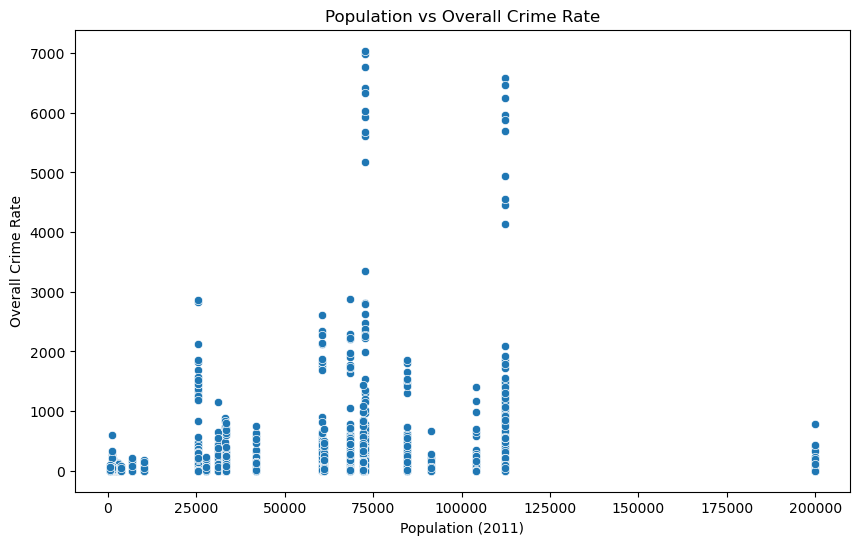

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2011- POP', y='Grand total', data=merged_data)
plt.title('Population vs Overall Crime Rate')
plt.xlabel('Population (2011)')
plt.ylabel('Overall Crime Rate')
plt.show()

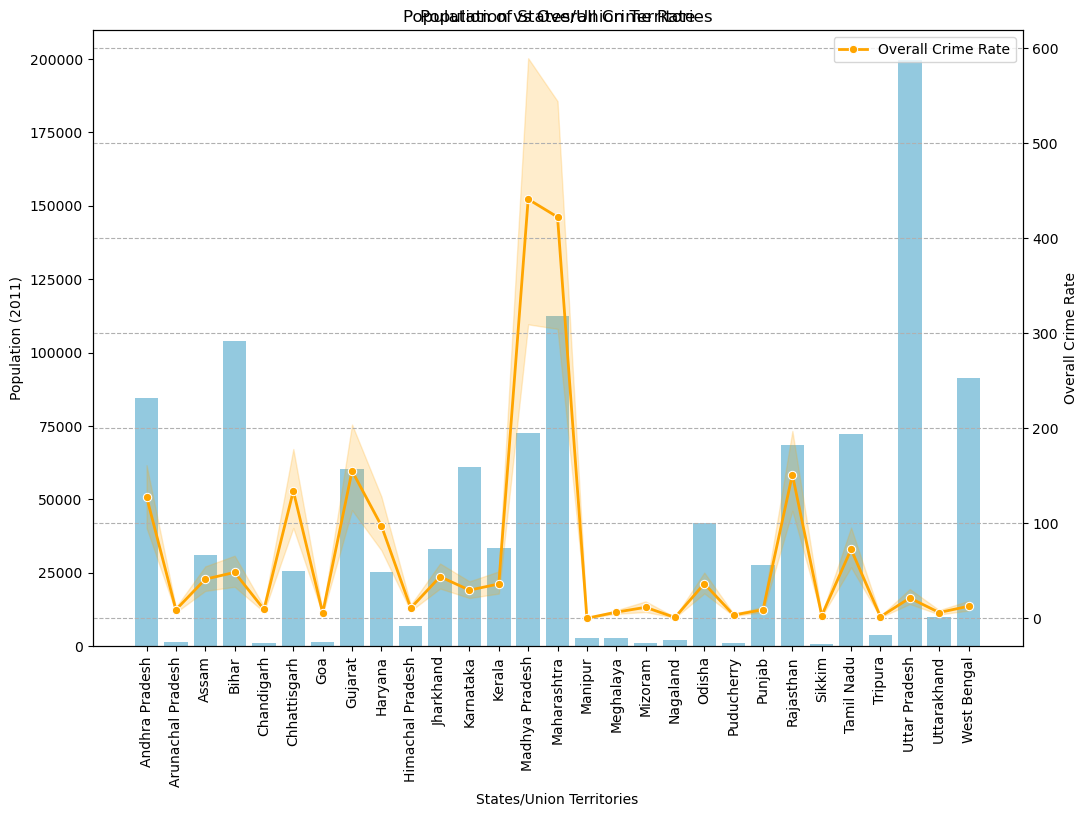

In [91]:
# Plot the Data
plt.figure(figsize=(12, 8))
sns.barplot(x='States_Union Territories', y='2011- POP', data=merged_data, color='skyblue', label='Population')
plt.xlabel('States/Union Territories')
plt.ylabel('Population (2011)')
plt.title('Population of States/Union Territories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.twinx()  # Create a second y-axis sharing the same x-axis
sns.lineplot(x='States_Union Territories', y='Grand total', data=merged_data, color='orange', marker='o', linewidth=2, label='Overall Crime Rate')
plt.ylabel('Overall Crime Rate')
plt.grid(axis='y', linestyle='--')  # Add grid lines for crime rate
plt.title('Population vs Overall Crime Rate')
plt.show()

2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.



In [ ]:

#Each state crime report


Crime Report for Each State/Union Territory:

Andhra Pradesh:

Overall, Andhra Pradesh has a relatively high crime rate compared to other states.
The most prevalent crimes in Andhra Pradesh include murder, attempted murder, and rape.
The literacy rate in Andhra Pradesh has improved from 60.47% in 2001 to 67.02% in 2011.
However, despite the improvement in literacy rates, there hasn't been a significant decrease in crime rates.
Arunachal Pradesh:

Arunachal Pradesh has a relatively low crime rate compared to other states.
The most common crimes reported in Arunachal Pradesh include murder and theft.
The literacy rate in Arunachal Pradesh has increased from 54.34% in 2001 to 65.39% in 2011.
The increase in literacy rates might contribute to the awareness and reporting of crimes in the state.
Assam:

Assam has a moderate crime rate, with crimes like murder, rape, and burglary being prevalent.
The literacy rate in Assam has increased from 63.25% in 2001 to 72.19% in 2011.
Despite the improvement in literacy rates, crime rates remain a concern in Assam.
Bihar:

Bihar has one of the highest crime rates among all states.
Crimes such as murder, theft, and assault are widespread in Bihar.
The literacy rate in Bihar has improved from 47.00% in 2001 to 61.80% in 2011.
However, the increase in literacy rates has not resulted in a significant reduction in crime rates.
Chandigarh:

Chandigarh has a relatively low crime rate compared to other states/union territories.
Crimes reported in Chandigarh include theft, assault, and fraud.
The literacy rate in Chandigarh is relatively high, with 86.63% in 2011.
The high literacy rate might contribute to better law enforcement and crime prevention measures in the union territory.
Overall:

Crime rates vary significantly across different states and union territories in India.
While some states have high crime rates, others have relatively low crime rates.
There is a complex relationship between crime rates and literacy rates, with some states showing improvement despite high crime rates.
Law enforcement agencies and policymakers need to address the underlying socio-economic factors contributing to crime in each state to effectively combat crime and ensure the safety of citizens.




